In [ ]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
import time
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf

from google.colab import files

In [ ]:
url = "https://www.renthop.com/search?bathrooms=1&q=&area-input=&areas=3r4g&search_title=Upper+West+Side&search_type=nyc&min_price=2000&max_price=5000&sort=hopscore"

In [ ]:
ammenities = ['Laundry In Building', 'Doorman', 'No Fee', 'Pool', 'Dishwasher', 'Elevator']

In [ ]:
d = {'Link': list(),
         'Address': list(),
         'Price': list(),
         'Number of Beds': list(),
         'Number of Bathrooms': list(),
         'Size (sqft)': list(),
         'Distance from Closest Subway': list(),
         'Hop Score': list(),
         'Laundry In Building': list(),
         'Doorman': list(),
         'No Fee':list(),
         'Pool': list(),
         'Dishwasher' : list(),
         'Elevator' : list()
        }

In [ ]:
def func(url, d):
    print('NEXT')
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml')

    listings = results_page.find_all("div", {"class": "d-block d-md-flex search-listing my-3 my-md-0 py-0 py-md-4"})

    for listing in listings:
        title_page = listing.find('div', {'class' : 'search-info-title'})
        link = title_page.find("a", {"class" : "font-size-12 b"})['href']
        print(link)
        address = title_page.find("a", {"class" : "font-size-12 b"}).text
        address = re.sub(r'[^A-Za-z0-9, ]+', '', address)

        price = listing.find('div', {'class' : 'd-inline-block align-middle b font-size-20'}).text
        price = re.sub(r'[^A-Za-z0-9,$ ]+', '', price)


        info = listing.find_all('div', {'class' : "font-size-10 d-inline-block align-bottom"})
        bed = info[1].text
        bed = re.sub(r'[^A-Za-z0-9 ]+', '', bed)

        bath = info[2].text
        bath = re.sub(r'[^A-Za-z0-9. ]+', '', bath)

        if len(info)>3:
            size = info[3].text
            size = re.sub(r'[^0-9]+', '', size)
        else:
            size = "NaN"


        req = requests.get(link)
        listing_page = BeautifulSoup(req.content,'lxml')

        try:
            distance = listing_page.find('span', {'class':'inline-block font-size-12 font-black b'}).text

            ammenities_page = listing_page.find('div', {'style':'column-count: 2; column-gap: 20px; column-fill: auto;'})
            ammenity = ammenities_page.find_all('div', {'class':'font-size-10'})


            for i in ammenity:
                j = re.sub(r'[^A-Za-z0-9 ]+', '', i.text)
                if j in ammenities:
                        d[j].append(1)

            hop_score = listing_page.find('span', {'class':"b font-blue"}).text

            d['Hop Score'].append(re.sub(r'[^0-9.]+', '', hop_score))

            d['Link'].append(link)
            d['Address'].append(address)
            d['Price'].append(price)
            d['Number of Beds'].append(bed)
            d['Number of Bathrooms'].append(bath)
            d['Size (sqft)'].append(size)
            d['Distance from Closest Subway'].append(distance)


            for i in ammenities:
                if len(d[i]) != len(d['Address']):
                    d[i].append(0)

        except:
            d['Link'].append(link)
            d['Address'].append(address)
            d['Price'].append(price)
            d['Number of Beds'].append(bed)
            d['Number of Bathrooms'].append(bath)
            d['Size (sqft)'].append(size)

            distance = hop_score = 'NaN'
            d['Distance from Closest Subway'].append(distance)
            d['Hop Score'].append(hop_score)


            for i in ammenities:
                if len(d[i]) != len(d['Address']):
                    d[i].append('NaN')




    #if results_page.find("a", {"class": "next-page font-blue"}):
        #next_page = results_page.find("a", {"class": "next-page font-blue"})['href']
        #next_page_url = 'https://www.renthop.com' + next_page
        #func(next_page_url,d)


    return pd.DataFrame(d)


In [ ]:
def web_scrape(url, d):
    print('NEXT')
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml')

    listings = results_page.find_all("div", {"class": "d-block d-md-flex search-listing my-3 my-md-0 py-0 py-md-4"})

    for listing in listings:
        title_page = listing.find('div', {'class' : 'search-info-title'})
        link = title_page.find("a", {"class" : "font-size-12 b"})['href']
        print(link)
        address = title_page.find("a", {"class" : "font-size-12 b"}).text
        address = re.sub(r'[^A-Za-z0-9, ]+', '', address)

        price = listing.find('div', {'class' : 'd-inline-block align-middle b font-size-20'}).text
        price = re.sub(r'[^A-Za-z0-9,$ ]+', '', price)


        info = listing.find_all('div', {'class' : "font-size-10 d-inline-block align-bottom"})
        bed = info[1].text
        bed = re.sub(r'[^A-Za-z0-9 ]+', '', bed)

        bath = info[2].text
        bath = re.sub(r'[^A-Za-z0-9. ]+', '', bath)

        if len(info)>3:
            size = info[3].text
            size = re.sub(r'[^0-9]+', '', size)
        else:
            size = "NaN"


        req = requests.get(link)
        listing_page = BeautifulSoup(req.content,'lxml')

        time.sleep(1)

        try:
            distance = listing_page.find('span', {'class':'inline-block font-size-12 font-black b'}).text

            ammenities_page = listing_page.find('div', {'style':'column-count: 2; column-gap: 20px; column-fill: auto;'})
            ammenity = ammenities_page.find_all('div', {'class':'font-size-10'})


            for i in ammenity:
                j = re.sub(r'[^A-Za-z0-9 ]+', '', i.text)
                if j in ammenities:
                        d[j].append(1)

            hop_score = listing_page.find('span', {'class':"b font-blue"}).text

            d['Hop Score']. append(re.sub(r'[^0-9.]+', '', hop_score))

            d['Link'].append(link)
            d['Address'].append(address)
            d['Price'].append(price)
            d['Number of Beds'].append(bed)
            d['Number of Bathrooms'].append(bath)
            d['Size (sqft)'].append(size)
            d['Distance from Closest Subway'].append(distance)


            for i in ammenities:
                if len(d[i]) != len(d['Address']):
                    d[i].append(0)
        except:
            None


    if results_page.find("a", {"class": "next-page font-blue"}):
        next_page = results_page.find("a", {"class": "next-page font-blue"})['href']
        next_page_url = 'https://www.renthop.com' + next_page
        func_test(next_page_url,d)

    return pd.DataFrame(d)


In [ ]:
df = web_scrape(url, d)
df

In [ ]:
pip install openpyxl

In [ ]:
df.to_excel('renthop_data.xlsx', index=False)

# Import the data

In [ ]:
uploaded = files.upload()

df = pd.read_excel('renthop_data.xlsx')
df.head()


Saving renthop_data.xlsx to renthop_data.xlsx


,Link,Address,Price,Number of Beds,Number of Bathrooms,Size (sqft),Distance from Closest Subway,Hop Score,Laundry In Building,Doorman,No Fee,Pool,Dishwasher,Elevator
0,https://www.renthop.com/listings/850-amsterdam...,"850 Amsterdam Avenue, Apt 2C","$3,300",1 Bed,1 Bath,NaN,(680 ft mi • 3 min) •,100.0,1,1,1,0,0,1
1,https://www.renthop.com/listings/808-columbus-...,"808 Columbus Avenue, Apt 10E","$4,913",1 Bed,1 Bath,652.0,(0.23 mi mi • 5 min) •,100.0,0,0,1,0,0,1
2,https://www.renthop.com/listings/801-amsterdam...,"801 Amsterdam Avenue, Apt 07G","$4,552",1 Bed,1 Bath,671.0,(0.23 mi mi • 5 min) •,100.0,0,0,1,0,0,1
3,https://www.renthop.com/listings/203-west-108t...,"203 West 108th Street, Apt 12A","$3,987",3 Bed,2 Bath,NaN,(810 ft mi • 3 min) •,100.0,0,0,1,0,0,0
4,https://www.renthop.com/listings/west-end-ave/...,"75 West End Ave, Apt S7F","$4,100",1 Bed,1 Bath,NaN,(0.37 mi mi • 9 min) •,100.0,0,1,0,0,1,0


In [ ]:
#process nan
df['Size (sqft)'] = df['Size (sqft)'].replace('',np.nan,regex = True)

In [ ]:
df['distance_to_subway'] = np.zeros
df['times_to_subway'] = np.zeros
for i in range(len(df['Distance from Closest Subway'])):
    r = "[() ]"
    x = re.sub(r,"",df['Distance from Closest Subway'][i]).split("•")
    n = "[A-Za_z]"
    df['distance_to_subway'][i] = re.sub(n,"",x[0])
    df['times_to_subway'][i] = re.sub(n,"",x[1]).replace('min','')
df

/var/folders/rp/nw6h5p9140s6nymnfr9lmlbh0000gn/T/ipykernel_86409/1499736614.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_subway'][i] = re.sub(n,"",x[0])
/var/folders/rp/nw6h5p9140s6nymnfr9lmlbh0000gn/T/ipykernel_86409/1499736614.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['times_to_subway'][i] = re.sub(n,"",x[1]).replace('min','')


,Link,Address,Price,Number of Beds,Number of Bathrooms,Size (sqft),Distance from Closest Subway,Hop Score,Laundry In Building,Doorman,No Fee,Pool,Dishwasher,Elevator,distance_to_subway,times_to_subway
0,https://www.renthop.com/listings/850-amsterdam...,"850 Amsterdam Avenue, Apt 2C","$3,300",1 Bed,1 Bath,NaN,(680 ft mi • 3 min) •,100.0,1,1,1,0,0,1,680ftmi,3
1,https://www.renthop.com/listings/808-columbus-...,"808 Columbus Avenue, Apt 10E","$4,913",1 Bed,1 Bath,652.0,(0.23 mi mi • 5 min) •,100.0,0,0,1,0,0,1,0.23mimi,5
2,https://www.renthop.com/listings/801-amsterdam...,"801 Amsterdam Avenue, Apt 07G","$4,552",1 Bed,1 Bath,671.0,(0.23 mi mi • 5 min) •,100.0,0,0,1,0,0,1,0.23mimi,5
3,https://www.renthop.com/listings/203-west-108t...,"203 West 108th Street, Apt 12A","$3,987",3 Bed,2 Bath,NaN,(810 ft mi • 3 min) •,100.0,0,0,1,0,0,0,810ftmi,3
4,https://www.renthop.com/listings/west-end-ave/...,"75 West End Ave, Apt S7F","$4,100",1 Bed,1 Bath,NaN,(0.37 mi mi • 9 min) •,100.0,0,1,0,0,1,0,0.37mimi,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,https://www.renthop.com/listings/central-park-...,Central Park West,"$3,699",1 Bed Flex 2,1 Bath,NaN,(560 ft mi • 3 min) •,63.1,1,1,1,0,1,1,560ftmi,3
1143,https://www.renthop.com/listings/west-end-aven...,West End Avenue,"$3,350",1 Bed Flex 2,1 Bath,NaN,(650 ft mi • 3 min) •,63.1,1,1,1,0,1,1,650ftmi,3
1144,https://www.renthop.com/listings/west-end-aven...,West End Avenue,"$3,250",1 Bed Flex 2,1 Bath,NaN,(650 ft mi • 3 min) •,63.1,1,1,1,0,1,1,650ftmi,3
1145,https://www.renthop.com/listings/215-west-101s...,"215 West 101st Street, Apt 5G","$4,500",2 Bed,1 Bath,NaN,(620 ft mi • 3 min) •,80.2,1,1,1,0,1,1,620ftmi,3


In [ ]:
# Standardized distance units, all standardized into feet
df['new_distance'] = np.zeros
for i in range(len(df['distance_to_subway'])):
    temp_1 = df['distance_to_subway'][i][:-2]
    temp_2 = temp_1[-2:]
    temp_3=temp_1[:-2]
    if(temp_2=='mi'):
        df['new_distance'][i]=float(temp_3)*5280
    else:
        df['new_distance'][i]=temp_3
df

/var/folders/rp/nw6h5p9140s6nymnfr9lmlbh0000gn/T/ipykernel_86409/436249196.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_distance'][i]=temp_3
/var/folders/rp/nw6h5p9140s6nymnfr9lmlbh0000gn/T/ipykernel_86409/436249196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_distance'][i]=float(temp_3)*5280


,Link,Address,Price,Number of Beds,Number of Bathrooms,Size (sqft),Distance from Closest Subway,Hop Score,Laundry In Building,Doorman,No Fee,Pool,Dishwasher,Elevator,distance_to_subway,times_to_subway,new_distance
0,https://www.renthop.com/listings/850-amsterdam...,"850 Amsterdam Avenue, Apt 2C","$3,300",1 Bed,1 Bath,NaN,(680 ft mi • 3 min) •,100.0,1,1,1,0,0,1,680ftmi,3,680
1,https://www.renthop.com/listings/808-columbus-...,"808 Columbus Avenue, Apt 10E","$4,913",1 Bed,1 Bath,652.0,(0.23 mi mi • 5 min) •,100.0,0,0,1,0,0,1,0.23mimi,5,1214.4
2,https://www.renthop.com/listings/801-amsterdam...,"801 Amsterdam Avenue, Apt 07G","$4,552",1 Bed,1 Bath,671.0,(0.23 mi mi • 5 min) •,100.0,0,0,1,0,0,1,0.23mimi,5,1214.4
3,https://www.renthop.com/listings/203-west-108t...,"203 West 108th Street, Apt 12A","$3,987",3 Bed,2 Bath,NaN,(810 ft mi • 3 min) •,100.0,0,0,1,0,0,0,810ftmi,3,810
4,https://www.renthop.com/listings/west-end-ave/...,"75 West End Ave, Apt S7F","$4,100",1 Bed,1 Bath,NaN,(0.37 mi mi • 9 min) •,100.0,0,1,0,0,1,0,0.37mimi,9,1953.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,https://www.renthop.com/listings/central-park-...,Central Park West,"$3,699",1 Bed Flex 2,1 Bath,NaN,(560 ft mi • 3 min) •,63.1,1,1,1,0,1,1,560ftmi,3,560
1143,https://www.renthop.com/listings/west-end-aven...,West End Avenue,"$3,350",1 Bed Flex 2,1 Bath,NaN,(650 ft mi • 3 min) •,63.1,1,1,1,0,1,1,650ftmi,3,650
1144,https://www.renthop.com/listings/west-end-aven...,West End Avenue,"$3,250",1 Bed Flex 2,1 Bath,NaN,(650 ft mi • 3 min) •,63.1,1,1,1,0,1,1,650ftmi,3,650
1145,https://www.renthop.com/listings/215-west-101s...,"215 West 101st Street, Apt 5G","$4,500",2 Bed,1 Bath,NaN,(620 ft mi • 3 min) •,80.2,1,1,1,0,1,1,620ftmi,3,620


In [ ]:
for i in range(len(df['Price'])):
    df['Price'][i] = df['Price'][i].replace('$','')
    df['Number of Bathrooms'][i] =df['Number of Bathrooms'][i].replace('Bath','')
    df['Number of Beds'][i] = df['Number of Beds'][i].strip()
    if (df['Number of Beds'][i] == 'Loft') or (df['Number of Beds'][i] == 'Private Room') or (df['Number of Beds'][i] == 'Studio'):
        df['Number of Beds'][i] = str(1)
    elif len(df['Number of Beds'][i]) == 5:
        df['Number of Beds'][i] = df['Number of Beds'][i][0]
    else:
        df['Number of Beds'][i] = df['Number of Beds'][i][-1]

df.drop(labels=['Distance from Closest Subway','distance_to_subway'], axis=1, inplace=True)
df

/var/folders/rp/nw6h5p9140s6nymnfr9lmlbh0000gn/T/ipykernel_86409/887832115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = df['Price'][i].replace('$','')
/var/folders/rp/nw6h5p9140s6nymnfr9lmlbh0000gn/T/ipykernel_86409/887832115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of Bathrooms'][i] =df['Number of Bathrooms'][i].replace('Bath','')
/var/folders/rp/nw6h5p9140s6nymnfr9lmlbh0000gn/T/ipykernel_86409/887832115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,Link,Address,Price,Number of Beds,Number of Bathrooms,Size (sqft),Hop Score,Laundry In Building,Doorman,No Fee,Pool,Dishwasher,Elevator,times_to_subway,new_distance
0,https://www.renthop.com/listings/850-amsterdam...,"850 Amsterdam Avenue, Apt 2C","3,300",1,1,NaN,100.0,1,1,1,0,0,1,3,680
1,https://www.renthop.com/listings/808-columbus-...,"808 Columbus Avenue, Apt 10E","4,913",1,1,652.0,100.0,0,0,1,0,0,1,5,1214.4
2,https://www.renthop.com/listings/801-amsterdam...,"801 Amsterdam Avenue, Apt 07G","4,552",1,1,671.0,100.0,0,0,1,0,0,1,5,1214.4
3,https://www.renthop.com/listings/203-west-108t...,"203 West 108th Street, Apt 12A","3,987",3,2,NaN,100.0,0,0,1,0,0,0,3,810
4,https://www.renthop.com/listings/west-end-ave/...,"75 West End Ave, Apt S7F","4,100",1,1,NaN,100.0,0,1,0,0,1,0,9,1953.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,https://www.renthop.com/listings/central-park-...,Central Park West,"3,699",2,1,NaN,63.1,1,1,1,0,1,1,3,560
1143,https://www.renthop.com/listings/west-end-aven...,West End Avenue,"3,350",2,1,NaN,63.1,1,1,1,0,1,1,3,650
1144,https://www.renthop.com/listings/west-end-aven...,West End Avenue,"3,250",2,1,NaN,63.1,1,1,1,0,1,1,3,650
1145,https://www.renthop.com/listings/215-west-101s...,"215 West 101st Street, Apt 5G","4,500",2,1,NaN,80.2,1,1,1,0,1,1,3,620


In [ ]:
from pathlib import Path
output_file_name = "cleaned.xlsx"
my_file = Path(output_file_name)
df.to_excel(output_file_name, sheet_name='bom')

In [ ]:
df_cleaned = pd.read_excel('cleaned.xlsx')
#df_cleaned=df.copy()
df_cleaned

,Unnamed: 0,Link,Address,Price,Number of Beds,Number of Bathrooms,Size (sqft),Hop Score,Laundry In Building,Doorman,No Fee,Pool,Dishwasher,Elevator,times_to_subway,new_distance
0,0,https://www.renthop.com/listings/850-amsterdam...,"850 Amsterdam Avenue, Apt 2C","3,300",1,1.0,Nan,100.0,1,1,1,0,0,1,3,680
1,1,https://www.renthop.com/listings/808-columbus-...,"808 Columbus Avenue, Apt 10E","4,913",1,1.0,652,100.0,0,0,1,0,0,1,5,1214.4
2,2,https://www.renthop.com/listings/801-amsterdam...,"801 Amsterdam Avenue, Apt 07G","4,552",1,1.0,671,100.0,0,0,1,0,0,1,5,1214.4
3,3,https://www.renthop.com/listings/203-west-108t...,"203 West 108th Street, Apt 12A","3,987",3,2.0,Nan,100.0,0,0,1,0,0,0,3,810
4,4,https://www.renthop.com/listings/west-end-ave/...,"75 West End Ave, Apt S7F","4,100",1,1.0,Nan,100.0,0,1,0,0,1,0,9,1953.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1142,https://www.renthop.com/listings/central-park-...,Central Park West,"3,699",2,1.0,Nan,63.1,1,1,1,0,1,1,3,560
1143,1143,https://www.renthop.com/listings/west-end-aven...,West End Avenue,"3,350",2,1.0,Nan,63.1,1,1,1,0,1,1,3,650
1144,1144,https://www.renthop.com/listings/west-end-aven...,West End Avenue,"3,250",2,1.0,Nan,63.1,1,1,1,0,1,1,3,650
1145,1145,https://www.renthop.com/listings/215-west-101s...,"215 West 101st Street, Apt 5G","4,500",2,1.0,Nan,80.2,1,1,1,0,1,1,3,620


In [ ]:
# df_cleaned.dtypes

In [ ]:
df_cleaned['Price']=df_cleaned['Price'].str.strip().str.replace(',','')
df_cleaned['Price']=df_cleaned['Price'].astype('float')

In [ ]:
df_cleaned['Number of Beds']=df_cleaned['Number of Beds'].str.strip()
df_cleaned['Number of Beds']=df_cleaned['Number of Beds'].astype('float')

In [ ]:
df_cleaned['Number of Bathrooms']=df_cleaned['Number of Bathrooms'].str.strip()
df_cleaned['Number of Bathrooms']=df_cleaned['Number of Bathrooms'].astype('float')

In [ ]:
for size in df_cleaned['Size (sqft)']:
    if size=='NaN':
        continue
    else:
        #df_cleaned['Size (sqft)']=df_cleaned['Size (sqft)'].strip()
        df_cleaned['Size (sqft)']=df_cleaned['Size (sqft)'].astype('float')

df_cleaned['Size (sqft)']

0         NaN
1       652.0
2       671.0
3         NaN
4         NaN
        ...  
1142      NaN
1143      NaN
1144      NaN
1145      NaN
1146    950.0
Name: Size (sqft), Length: 1147, dtype: float64

In [ ]:
df_cleaned['times_to_subway']=df_cleaned['times_to_subway'].str.strip()
df_cleaned['times_to_subway']=df_cleaned['times_to_subway'].astype('float')

In [ ]:
# df_cleaned['new_distance']=df_cleaned['new_distance'].str.strip()
# df_cleaned['new_distance']=df_cleaned['new_distance'].astype('float')

In [ ]:
df_cleaned.dtypes

Link                    object
Address                 object
Price                  float64
Number of Beds         float64
Number of Bathrooms    float64
Size (sqft)            float64
Hop Score              float64
Laundry In Building      int64
Doorman                  int64
No Fee                   int64
Pool                     int64
Dishwasher               int64
Elevator                 int64
times_to_subway        float64
new_distance            object
dtype: object

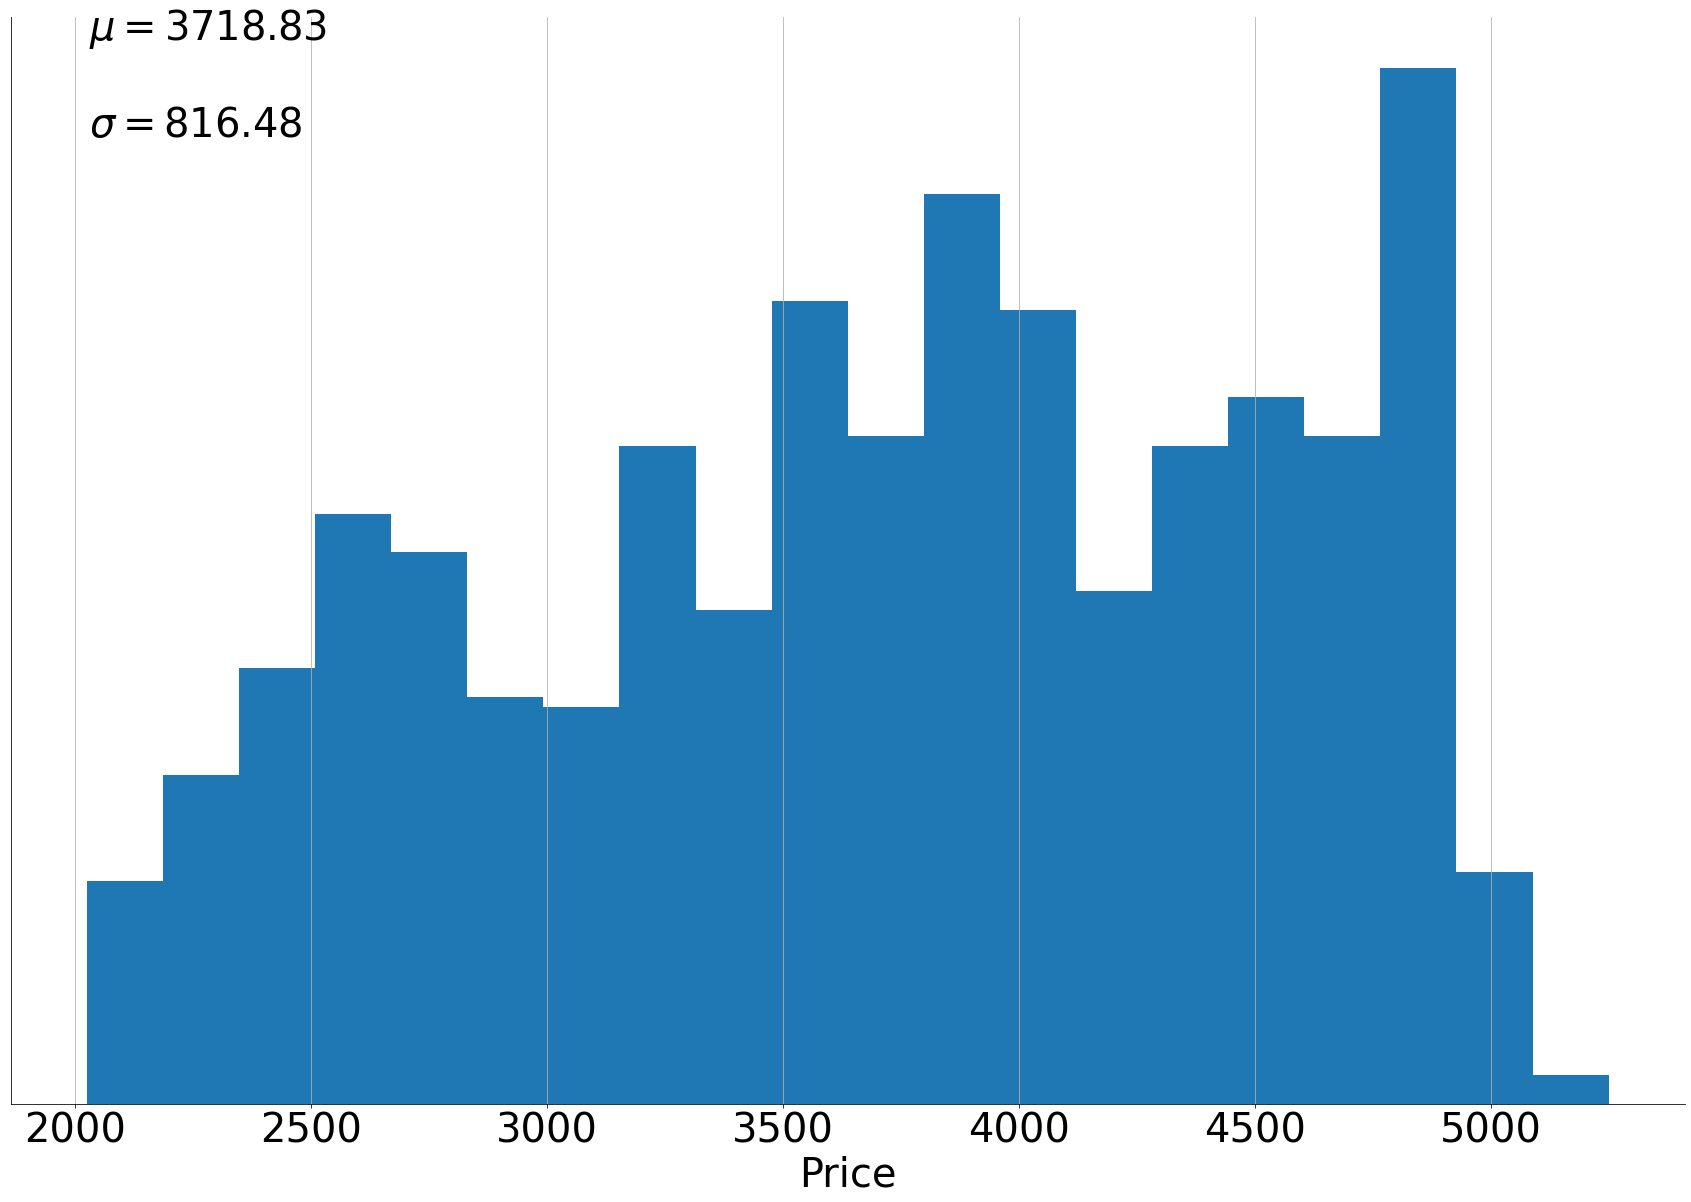

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(30,20))
df_cleaned.Price.hist(bins=20)

plt.xticks(fontsize=40)
plt.yticks([])

plt.xlabel('Price', fontsize=40)

plt.text(2030, 110, f'$\\mu = {round(df_cleaned.Price.mean(),2)}$', fontsize=40)
plt.text(2030, 100, f'$\\sigma = {round(df_cleaned.Price.std(),2)}$', fontsize=40)

sns.despine()

In [ ]:
df_cleaned.rename(columns={'Number of Beds': 'number_of_beds', 'Number of Bathrooms': 'number_of_bathrooms', 'Size (sqft)':'size_sqft', 'Hop Score':'hop_score', 'Laundry In Building':'laundry_in_building', 'No fee':'no_fee'},inplace = True)
df_cleaned

,Link,Address,Price,number_of_beds,number_of_bathrooms,size_sqft,hop_score,laundry_in_building,Doorman,No Fee,Pool,Dishwasher,Elevator,times_to_subway,new_distance
0,https://www.renthop.com/listings/850-amsterdam...,"850 Amsterdam Avenue, Apt 2C",3300.0,1.0,1.0,NaN,100.0,1,1,1,0,0,1,3.0,680
1,https://www.renthop.com/listings/808-columbus-...,"808 Columbus Avenue, Apt 10E",4913.0,1.0,1.0,652.0,100.0,0,0,1,0,0,1,5.0,1214.4
2,https://www.renthop.com/listings/801-amsterdam...,"801 Amsterdam Avenue, Apt 07G",4552.0,1.0,1.0,671.0,100.0,0,0,1,0,0,1,5.0,1214.4
3,https://www.renthop.com/listings/203-west-108t...,"203 West 108th Street, Apt 12A",3987.0,3.0,2.0,NaN,100.0,0,0,1,0,0,0,3.0,810
4,https://www.renthop.com/listings/west-end-ave/...,"75 West End Ave, Apt S7F",4100.0,1.0,1.0,NaN,100.0,0,1,0,0,1,0,9.0,1953.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,https://www.renthop.com/listings/central-park-...,Central Park West,3699.0,2.0,1.0,NaN,63.1,1,1,1,0,1,1,3.0,560
1143,https://www.renthop.com/listings/west-end-aven...,West End Avenue,3350.0,2.0,1.0,NaN,63.1,1,1,1,0,1,1,3.0,650
1144,https://www.renthop.com/listings/west-end-aven...,West End Avenue,3250.0,2.0,1.0,NaN,63.1,1,1,1,0,1,1,3.0,650
1145,https://www.renthop.com/listings/215-west-101s...,"215 West 101st Street, Apt 5G",4500.0,2.0,1.0,NaN,80.2,1,1,1,0,1,1,3.0,620


<AxesSubplot:>

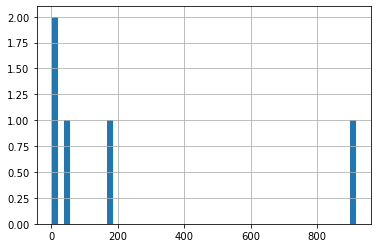

In [ ]:
df_cleaned.groupby('number_of_beds').size().sort_values(ascending=False).hist(bins=50)

<AxesSubplot:>

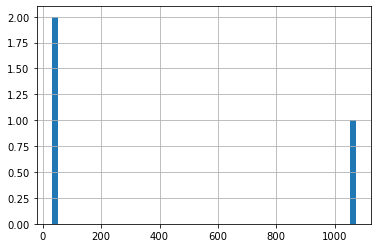

In [ ]:
df_cleaned.groupby('number_of_bathrooms').size().sort_values(ascending=False).hist(bins=50)

<AxesSubplot:>

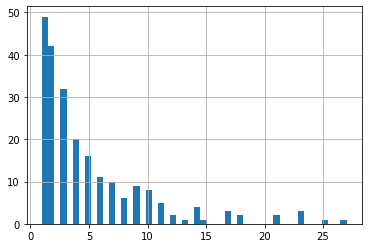

In [ ]:
df_cleaned.groupby('hop_score').size().sort_values(ascending=False).hist(bins=50)

<AxesSubplot:>

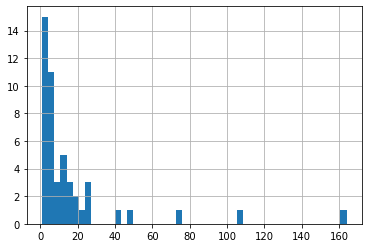

In [ ]:
df_cleaned.groupby('new_distance').size().sort_values(ascending=False).hist(bins=50)

<AxesSubplot:>

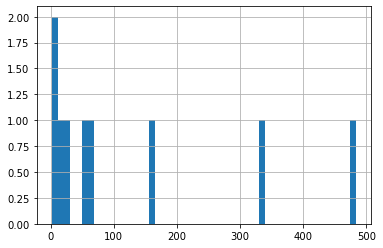

In [ ]:
df_cleaned.groupby('times_to_subway').size().sort_values(ascending=False).hist(bins=50)

In [ ]:
df_cleaned.corr()

,Price,number_of_beds,number_of_bathrooms,size_sqft,hop_score,laundry_in_building,Doorman,No Fee,Pool,Dishwasher,Elevator,times_to_subway
Price,1.000000,0.327804,0.202619,0.804247,-0.046299,0.158581,0.183811,0.049128,0.128935,0.246852,0.100680,0.177979
number_of_beds,0.327804,1.000000,0.411793,0.361565,-0.133322,-0.014302,-0.033560,0.179621,-0.049596,0.219153,-0.086688,-0.022298
number_of_bathrooms,0.202619,0.411793,1.000000,0.013693,0.003214,-0.094314,-0.163338,0.003293,-0.038805,0.013078,-0.237504,0.029410
size_sqft,0.804247,0.361565,0.013693,1.000000,-0.154357,0.230273,0.315339,0.048468,0.051146,0.203962,0.261659,0.162511
hop_score,-0.046299,-0.133322,0.003214,-0.154357,1.000000,-0.097497,-0.064050,-0.092107,0.100428,-0.078260,-0.063040,-0.004774
laundry_in_building,0.158581,-0.014302,-0.094314,0.230273,-0.097497,1.000000,0.525317,0.178834,0.093906,0.284247,0.539427,0.065485
Doorman,0.183811,-0.033560,-0.163338,0.315339,-0.064050,0.525317,1.000000,0.223324,0.141149,0.231262,0.610240,0.126902
No Fee,0.049128,0.179621,0.003293,0.048468,-0.092107,0.178834,0.223324,1.000000,-0.025120,0.171142,0.158855,0.134874
Pool,0.128935,-0.049596,-0.038805,0.051146,0.100428,0.093906,0.141149,-0.025120,1.000000,0.030243,0.091779,0.191846
Dishwasher,0.246852,0.219153,0.013078,0.203962,-0.078260,0.284247,0.231262,0.171142,0.030243,1.000000,0.167492,0.089164


In [ ]:
tab = pd.crosstab(df_cleaned['Price'], df_cleaned['size_sqft'])
stat, p, dof, expected = chi2_contingency(tab)
print(p)

0.0


In [ ]:
tab = pd.crosstab(df_cleaned['Price'], df_cleaned['number_of_beds'])
stat, p, dof, expected = chi2_contingency(tab)
print(p)

3.005691003816671e-178


In [ ]:
tab = pd.crosstab(df_cleaned['Price'], df_cleaned['hop_score'])
stat, p, dof, expected = chi2_contingency(tab)
print(p)

0.0


In [ ]:
tab = pd.crosstab(df_cleaned['Price'], df_cleaned['new_distance'])
stat, p, dof, expected = chi2_contingency(tab)
print(p)

0.0


In [ ]:
tab = pd.crosstab(df_cleaned['Price'], df_cleaned['times_to_subway'])
stat, p, dof, expected = chi2_contingency(tab)
print(p)

1.6267043040899523e-268


In [ ]:
df_cleaned.Price.corr(df_cleaned['number_of_beds'].astype(float))

0.3278040064252018

In [ ]:
df_cleaned.Price.corr(df_cleaned.hop_score)

-0.046298775987228126

In [ ]:
df_cleaned.Price.corr(df_cleaned.size_sqft)

0.8042466013436997

In [ ]:
# df_cleaned.Price.corr(df_cleaned['new_distance'].astype(float))

In [ ]:
df_cleaned.Price.corr(df_cleaned['times_to_subway'].astype(float))

0.17797944824137704

In [ ]:
def create_plot(var):
    '''
    This function takes the name of a variable in df_cleaned, and
    produces a plot of the variable against the price
    '''

    plt.figure(figsize=(8, 8))

    plt.plot(df_cleaned[var], df_cleaned.Price, linewidth=0, marker='x')

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.xlabel(var, fontsize=20)
    plt.ylabel('Price', fontsize=20)

    sns.despine()

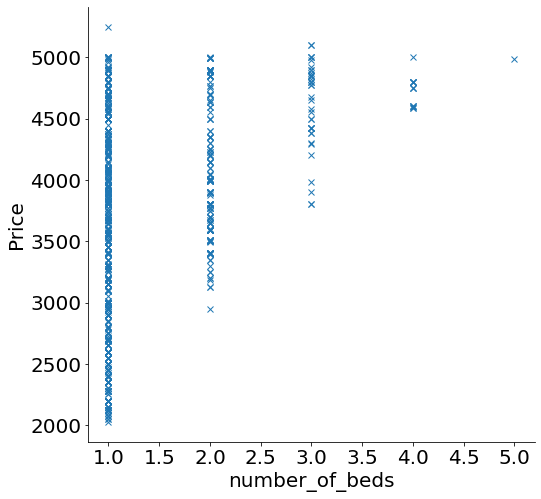

In [ ]:
create_plot('number_of_beds')

In [ ]:
def find_beta(var):
    df_cleaned[var]=df_cleaned[var].astype(float)
    return df_cleaned.Price.corr(df_cleaned[var])*df_cleaned.Price.std()/df_cleaned[var].std()

def find_alpha(var):
    df_cleaned[var]=df_cleaned[var].astype(float)
    return df_cleaned.Price.mean() - find_beta(var)*df_cleaned[var].mean()

beta = find_beta('number_of_beds')
alpha = find_alpha('number_of_beds')
print(f'$y = {round(alpha,2)} + {round(beta,2)}x$')

$y = 3148.29 + 451.63x$


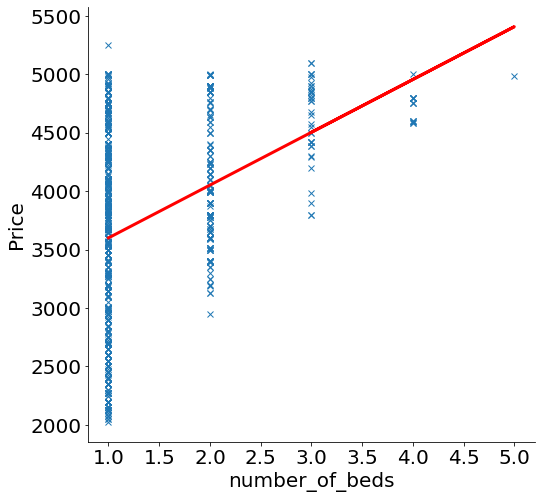

In [ ]:
create_plot('number_of_beds')

y_line = alpha + beta*df_cleaned.number_of_beds
plt.plot(df_cleaned.number_of_beds, y_line, linewidth=3, color='red')

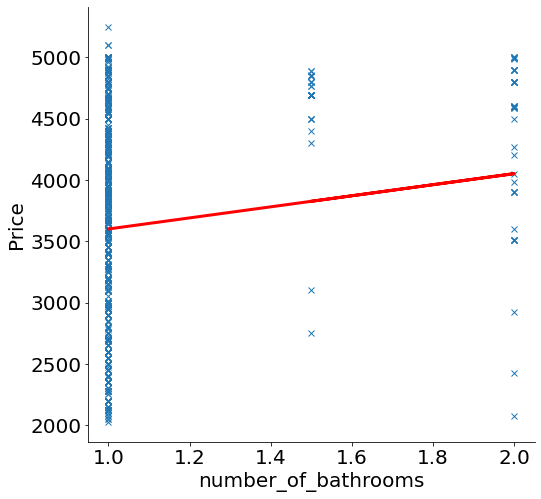

In [ ]:
df_cleaned.number_of_bathrooms=df_cleaned.number_of_bathrooms.astype(float)
create_plot('number_of_bathrooms')
y_line = alpha + beta*df_cleaned.number_of_bathrooms
plt.plot(df_cleaned.number_of_bathrooms, y_line, linewidth=3, color='red')

In [ ]:
# create_plot('size_sqft')
# beta = find_beta('size_sqft')
# alpha = find_alpha('size_sqft')
# y_line = alpha + beta*df_cleaned.size_sqft
# plt.plot(df_cleaned.size_sqft, y_line, linewidth=3, color='red')

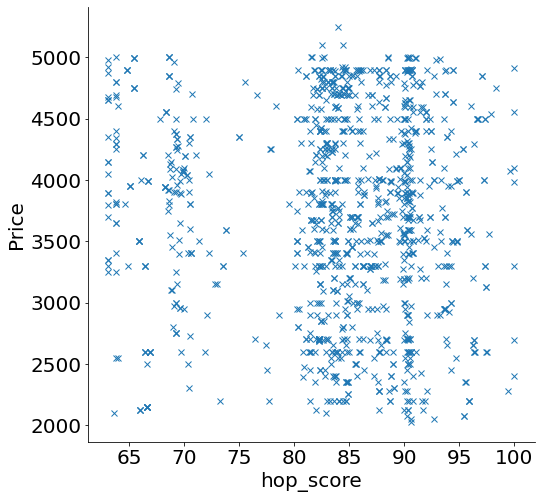

In [ ]:
create_plot('hop_score')

In [ ]:
# y_line = alpha + beta*df_cleaned.hop_score
# plt.plot(df_cleaned.hop_score, y_line, linewidth=3, color='red')

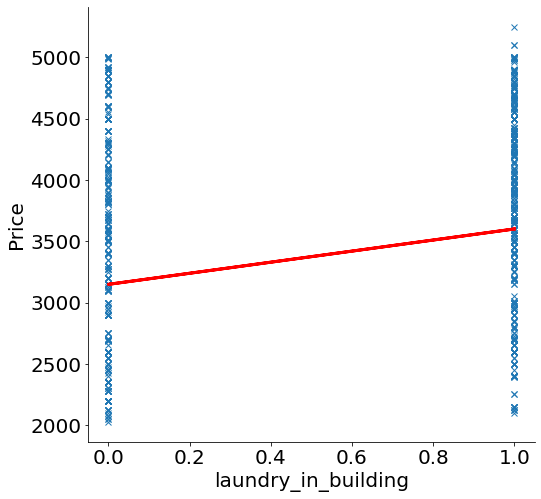

In [ ]:
create_plot('laundry_in_building')

y_line = alpha + beta*df_cleaned.laundry_in_building
plt.plot(df_cleaned.laundry_in_building, y_line, linewidth=3, color='red')


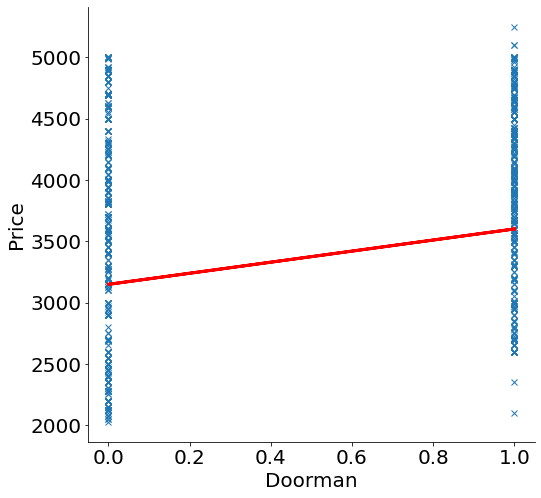

In [ ]:
create_plot('Doorman')
y_line = alpha + beta*df_cleaned.Doorman
plt.plot(df_cleaned.Doorman, y_line, linewidth=3, color='red')

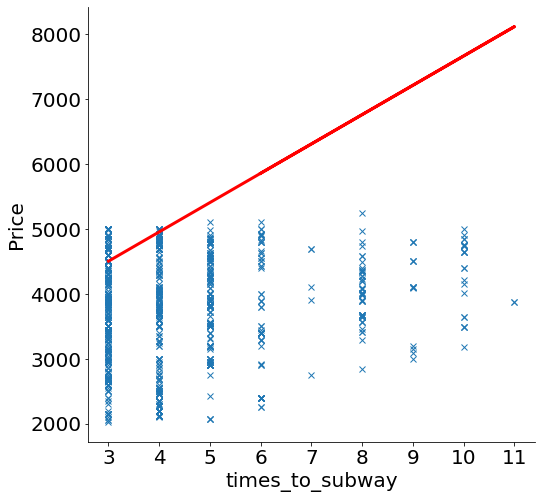

In [ ]:
df_cleaned.times_to_subway=df_cleaned.times_to_subway.astype(float)
create_plot('times_to_subway')

y_line = alpha + beta*df_cleaned.times_to_subway
plt.plot(df_cleaned.times_to_subway, y_line, linewidth=3, color='red')

,Link,Address,Price,number_of_beds,number_of_bathrooms,size_sqft,hop_score,laundry_in_building,Doorman,No Fee,Pool,Dishwasher,Elevator,times_to_subway,new_distance
0,https://www.renthop.com/listings/850-amsterdam...,"850 Amsterdam Avenue, Apt 2C",3300.0,1.0,1.0,NaN,100.0,1,1,1,0,0,1,3.0,680
1,https://www.renthop.com/listings/808-columbus-...,"808 Columbus Avenue, Apt 10E",4913.0,1.0,1.0,NaN,100.0,0,0,1,0,0,1,5.0,NaN
2,https://www.renthop.com/listings/801-amsterdam...,"801 Amsterdam Avenue, Apt 07G",4552.0,1.0,1.0,NaN,100.0,0,0,1,0,0,1,5.0,NaN
3,https://www.renthop.com/listings/203-west-108t...,"203 West 108th Street, Apt 12A",3987.0,3.0,2.0,NaN,100.0,0,0,1,0,0,0,3.0,810
4,https://www.renthop.com/listings/west-end-ave/...,"75 West End Ave, Apt S7F",4100.0,1.0,1.0,NaN,100.0,0,1,0,0,1,0,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,https://www.renthop.com/listings/central-park-...,Central Park West,3699.0,2.0,1.0,NaN,63.1,1,1,1,0,1,1,3.0,560
1143,https://www.renthop.com/listings/west-end-aven...,West End Avenue,3350.0,2.0,1.0,NaN,63.1,1,1,1,0,1,1,3.0,650
1144,https://www.renthop.com/listings/west-end-aven...,West End Avenue,3250.0,2.0,1.0,NaN,63.1,1,1,1,0,1,1,3.0,650
1145,https://www.renthop.com/listings/215-west-101s...,"215 West 101st Street, Apt 5G",4500.0,2.0,1.0,NaN,80.2,1,1,1,0,1,1,3.0,620


In [ ]:
smf.ols('Price ~ size_sqft + number_of_beds + number_of_bathrooms + hop_score', data=df_cleaned).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     145.9
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.18e-68
Time:                        13:17:11   Log-Likelihood:                -2271.3
No. Observations:                 300   AIC:                             4553.
Df Residuals:                     295   BIC:                             4571.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1951.2985    336.349      5.801      0.000    1289.350    2613.247
size_sqft               3.2459      0.143     22.664      0.000       2.964       3.528
number_of_beds       -317.0953    101.347     -3.129      0.002    -516.550    -117.641
number_of_bathrooms   470.1043    176.097      2.670      0.008     123.538     816.670
hop_score              -3.9035      3.310     -1.179      0.239     -10.419       2.612
==============================================================================
Omnibus:                       12.160   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.374
Skew:                           0.409   Prob(JB):                      0.00125
Kurtosis:                       3.634   Cond. No.                     7.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_cleaned_copy = df_cleaned.copy()